In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carregando o data frame
df_registros_prod = pd.read_excel('../data/registros-prod.xlsx')

In [3]:
df_registros_prod

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
0,320.15,0.88,A,10.144919
1,320.14,1.55,A,11.547027
2,284.85,2.97,A,11.112109
3,263.92,2.36,C,9.900123
4,276.22,2.98,C,10.079822
...,...,...,...,...
495,301.01,1.59,A,10.471494
496,331.41,2.60,A,12.048504
497,311.08,0.38,C,6.128060
498,315.56,1.89,B,9.198321


In [4]:
df_registros_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   QTD_CHOC     500 non-null    float64
 1   VAR_1        500 non-null    float64
 2   VAR_2        500 non-null    object 
 3   PESO_BOMBOM  500 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.8+ KB


- VAR_2 unica variável categórica
- O restante são variáveis contínuas

### Distribuição dos dados das variáveis contínuas

In [9]:
# criando um novo dataframe com as variaveis não categóricas
df_registros_prod_cont = df_registros_prod.loc[:, df_registros_prod.columns != 'VAR_2']
df_registros_prod_cont.head()

,QTD_CHOC,VAR_1,PESO_BOMBOM
0,320.15,0.88,10.144919
1,320.14,1.55,11.547027
2,284.85,2.97,11.112109
3,263.92,2.36,9.900123
4,276.22,2.98,10.079822


In [8]:
df_registros_prod_cont.describe()

,QTD_CHOC,VAR_1,PESO_BOMBOM
count,500.000000,500.000000,500.000000
mean,291.264600,2.098180,10.395002
std,45.182499,0.711166,1.572233
min,112.910000,0.050000,4.543124
25%,259.267500,1.630000,9.425819
50%,295.450000,2.300000,10.334273
75%,325.137500,2.672500,11.379932
max,436.070000,2.980000,17.362728


#### Boxplot e histograma

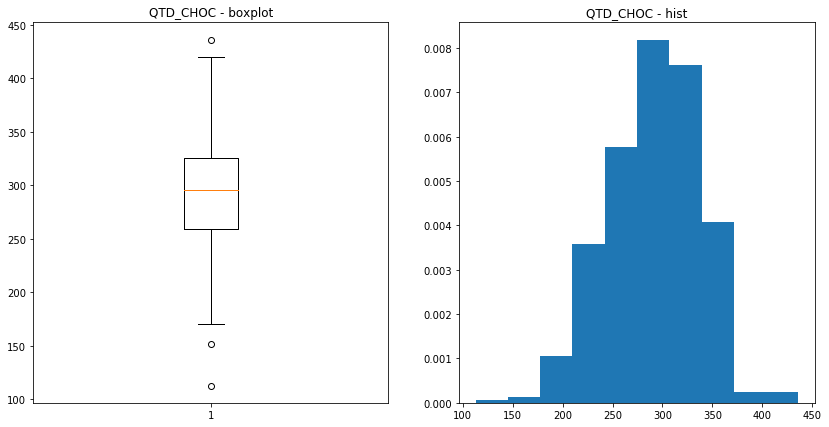

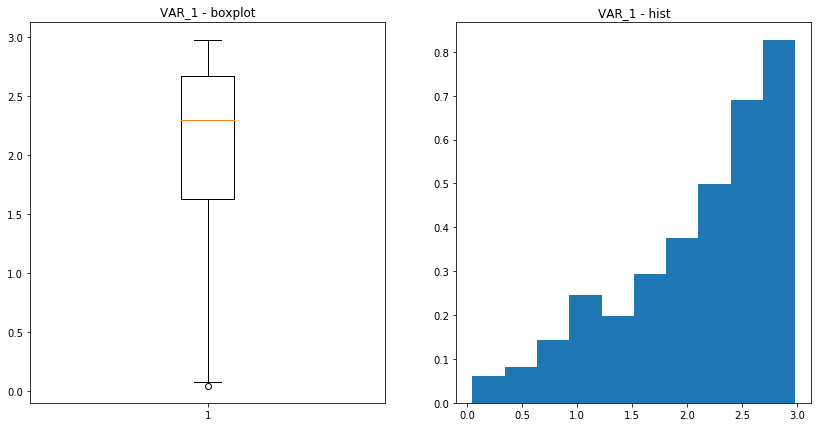

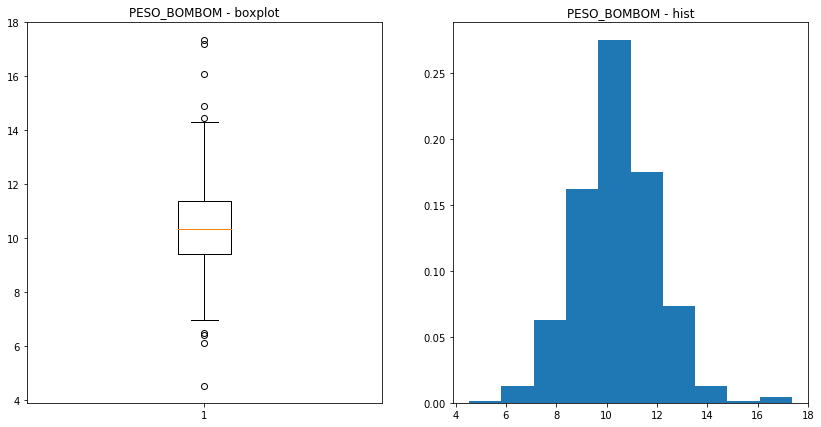

In [69]:
for col in df_registros_prod_cont.columns:
    fig, ax = plt.subplots(1,2,figsize=(14, 7))
    ax[0].set_title(col + ' - boxplot')
    ax[0].boxplot(df_registros_prod_cont[col].values)
    ax[1].set_title(col + ' - hist')
    ax[1].hist(df_registros_prod_cont[col].values, density=True, bins=10)
    plt.show()

- PESO_BOMBOM apresenta uma boa dispersão dos dados, porém possui vários outliers, ou seja, bombons fora do range de 7-14g
- VAR_1 apresenta uma grande dispersão nos dados, uma assimetria negativa (proximo do 3 quartil) e bem pouco outliers
- QTD_CHOC apresenta uma dispersão um pouaco maior que o peso do bombom, uma leve assimetria negativa e alguns outliers

#### Densiade e assimetria

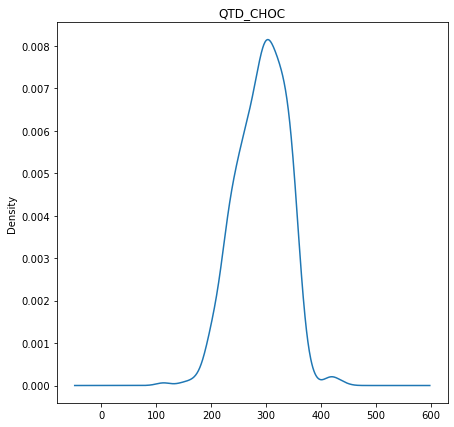

Assimetria: -0.268949674189517


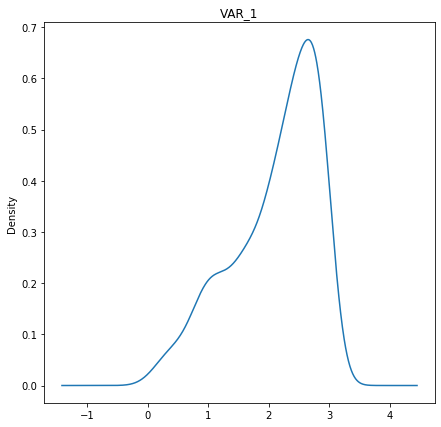

Assimetria: -0.8218865329171656


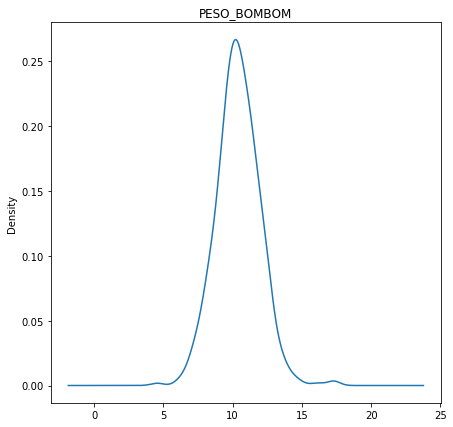

Assimetria: 0.27704104903634325


In [70]:
for col in df_registros_prod_cont.columns:
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_title(col)
    df_registros_prod_cont[col].plot(kind='kde')
    plt.show()
    print("Assimetria: " + str(df_registros_prod_cont[col].skew()))

 - Apenas o PESO_BOMBOM segue uma distribuição normal, onde segue uma frequencia entre mais ou menos 5g até 15g
 - VAR_1 segue uma distribuição inclinada negativamente, com uma calda maior do lado esquerdo
 - QTD_CHOC segue uma distribuição levemente inclinada negativamente bem próxima da distribuição normal (media 291 e mediana 295)

### Relacionamento entre as variáveis contínuas

In [115]:
df_registros_prod_cont.corr()

,QTD_CHOC,VAR_1,PESO_BOMBOM
QTD_CHOC,1.000000,-0.029062,0.437217
VAR_1,-0.029062,1.000000,0.316657
PESO_BOMBOM,0.437217,0.316657,1.000000


#### Relação da quantidade de chocolate com o peso do bombom

Text(0, 0.5, 'Peso do bombom (g)')

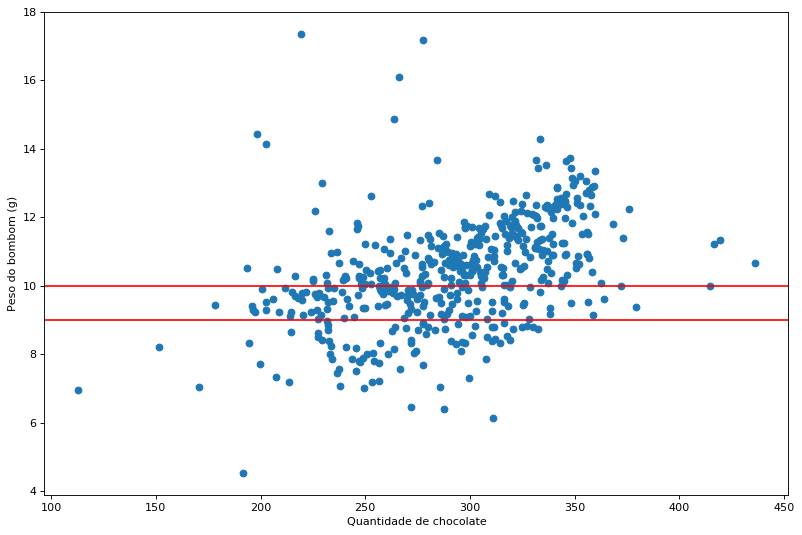

In [71]:
x = df_registros_prod_cont['QTD_CHOC']
y = df_registros_prod_cont['PESO_BOMBOM']

plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(x, y)
plt.axhline(y=10, color='r', linestyle='-')
plt.axhline(y=9, color='r', linestyle='-')
plt.xlabel('Quantidade de chocolate')
plt.ylabel('Peso do bombom (g)')

- Conforme vai subindo a quantidade de chocolate, vai subindo o peso do bombom, uma leve correlação positiva
- Observando o gráfico é possível identificar que a quantidade de chocolate que mais produz bombom dentro do padrão (9-10 gramas) está entre 210 e 280, em 300 já começa ter um desperdício grande. 

In [62]:
df_ideal = df_registros_prod_cont[(df_registros_prod_cont['PESO_BOMBOM'] >= 9) & (df_registros_prod_cont['PESO_BOMBOM'] < 11)]

In [65]:
df_ideal.describe()

,QTD_CHOC,VAR_1,PESO_BOMBOM
count,251.000000,251.00000,251.000000
mean,282.356215,2.20494,10.047574
std,43.164835,0.65789,0.550024
min,178.150000,0.08000,9.028357
25%,251.340000,1.92000,9.602585
50%,285.410000,2.41000,10.045977
75%,308.245000,2.70000,10.511649
max,436.070000,2.98000,10.983707


#### Relação de VAR_1 com o peso do bombom

Text(0, 0.5, 'Peso do bombom (g)')

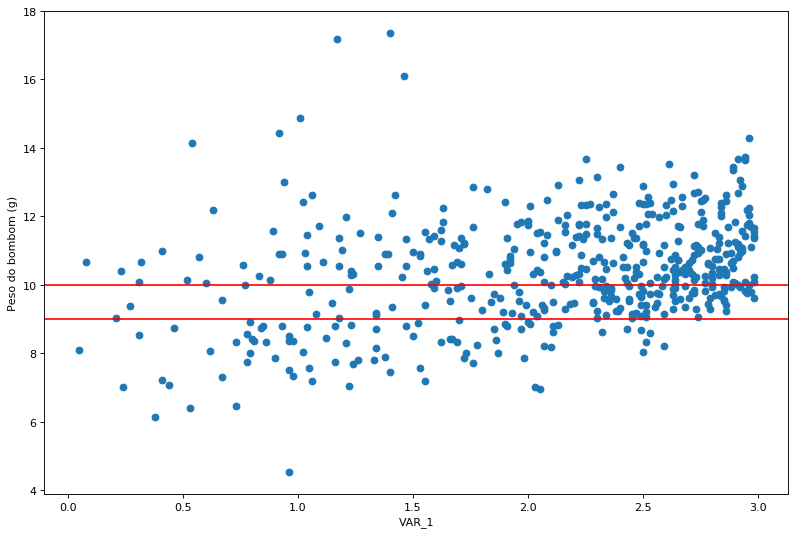

In [54]:
x = df_registros_prod_cont['VAR_1']
y = df_registros_prod_cont['PESO_BOMBOM']

plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(x, y)
plt.axhline(y=10, color='r', linestyle='-')
plt.axhline(y=9, color='r', linestyle='-')
plt.xlabel('VAR_1')
plt.ylabel('Peso do bombom (g)')


- Observando o gráfico é possível identificar que a quantidade de VAR_1 que mais produz bombom dentro do padrão (9-10 gramas) está entre 2.2 e 3.0, porém já começa ter um desperdício grande. 

### Variavel categórica VAR_2 com o peso bombom

In [75]:
# Prepare petal length by species datasets
var2A = df_registros_prod[df_registros_prod['VAR_2'] == 'A']['PESO_BOMBOM']
var2B = df_registros_prod[df_registros_prod['VAR_2'] == 'B']['PESO_BOMBOM']
var2C = df_registros_prod[df_registros_prod['VAR_2'] == 'C']['PESO_BOMBOM']

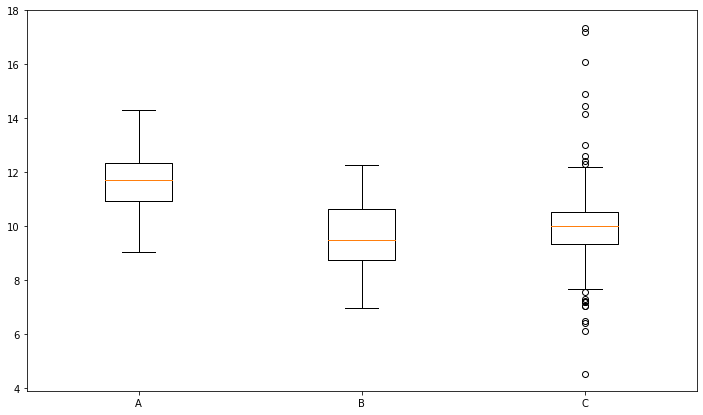

In [76]:
labels = ['A','B','C']
dataset = [var2A, var2B, var2C]
fig, ax = plt.subplots(figsize=(12, 7))
ax.boxplot(dataset, labels=labels)
plt.show()

- VAR_2 com valor A apresenta uma mediana do peso do bombom acima do 10g, assim gerando um custo maior
- VAR_2 com valor B tem a mediana do peso do bombom mais próxima dos 9g, assim gerando um maior descarte dos itens
- VAR_2 com valor C apresenta varios outliers, porém a mediana está mais próxima do peso do bombom esperado e a dispersão dos dados é menor

#### Verificando a quantidade de cada valor da variável VAR_2 nos bombons dentro e fora do padrão de qualidade (entre 9-10g)

In [113]:
padrao = df_registros_prod[(df_registros_prod['PESO_BOMBOM'] > 9) & (df_registros_prod['PESO_BOMBOM'] <=10)]["VAR_2"].value_counts()
descartado = df_registros_prod[(df_registros_prod['PESO_BOMBOM'] < 9)]["VAR_2"].value_counts()
prejuizo = df_registros_prod[(df_registros_prod['PESO_BOMBOM'] > 10) ]["VAR_2"].value_counts()

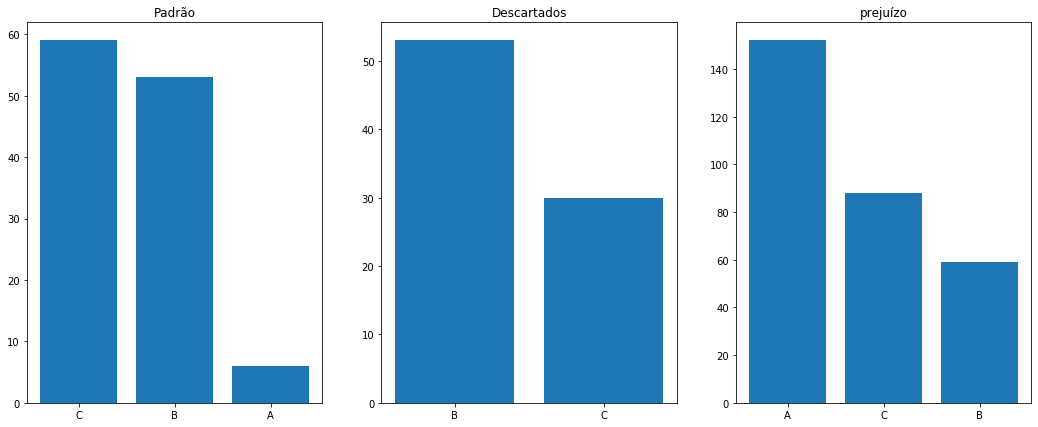

In [114]:
fig, ax = plt.subplots(1,3,figsize=(18, 7))
ax[0].set_title('Padrão')
ax[0].bar(padrao.index, padrao.values)
ax[1].set_title('Descartados')
ax[1].bar(descartado.index, descartado.values)
ax[2].set_title('prejuízo')
ax[2].bar(prejuizo.index, prejuizo.values)
plt.show()

- Valor A está em terceiro na produção de bombons dentro do padrão de qualidade, não produz nenhum bombom descartado e está em primeiro na produção de bombons com prejuízo
- Valor B está em segundo na produção de bombons dentro do padrão de qualidade, está em primeiro na produção de bombons descartados e está em terceiro na produção de bombons com prejuízo
- Valor C está em primeiro na produção de bombons dentro do padrão de qualidade, está em segundo na produção de bombons descartados e está em segundo na produção de bombons com prejuízo